## Clustering: IRIS Dataset
https://archive.ics.uci.edu/ml/datasets/iris

** Dataset Information: **

The data set contains 3 classes of iris plant (Iris setosa, Iris virginica and Iris versicolor) of 50 samples each, 150 samples in total.

** Attribute Information: (4 features and 1 class)**

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

** Objective of this project **

Cluster iris plant 

## Data

In [50]:
# Load Data
df  <- read.csv('iris.data',header=FALSE)

In [51]:
# Inspect Data
head(df,3)
colnames(df) <- c('sepal_length', 'sepal_width', 'petal_length', 
                     'petal_width', 'class')

V1,V2,V3,V4,V5
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa


In [52]:
dim(df)

[1] 150   5

In [53]:
str(df)

'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ class       : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...


In [54]:
summary(df)

  sepal_length    sepal_width     petal_length    petal_width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
             class   
 Iris-setosa    :50  
 Iris-versicolor:50  
 Iris-virginica :50  
                     
                     
                     

In [55]:
any(is.na(df))

[1] FALSE

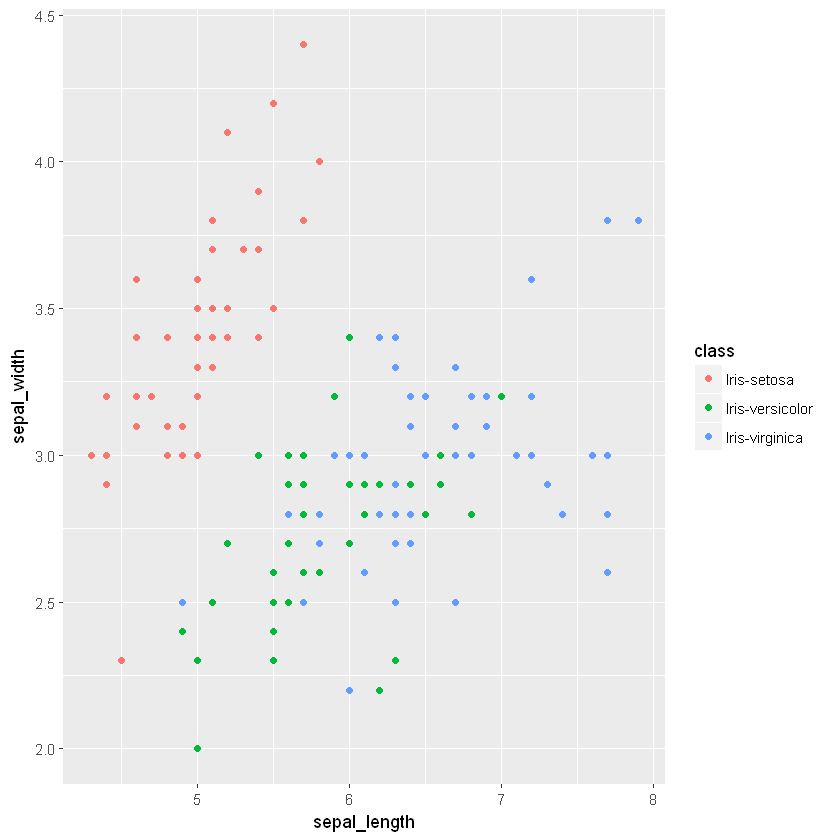

In [56]:
library(ggplot2)
ggplot(df, aes(sepal_length, sepal_width, color = class)) + 
    geom_point()

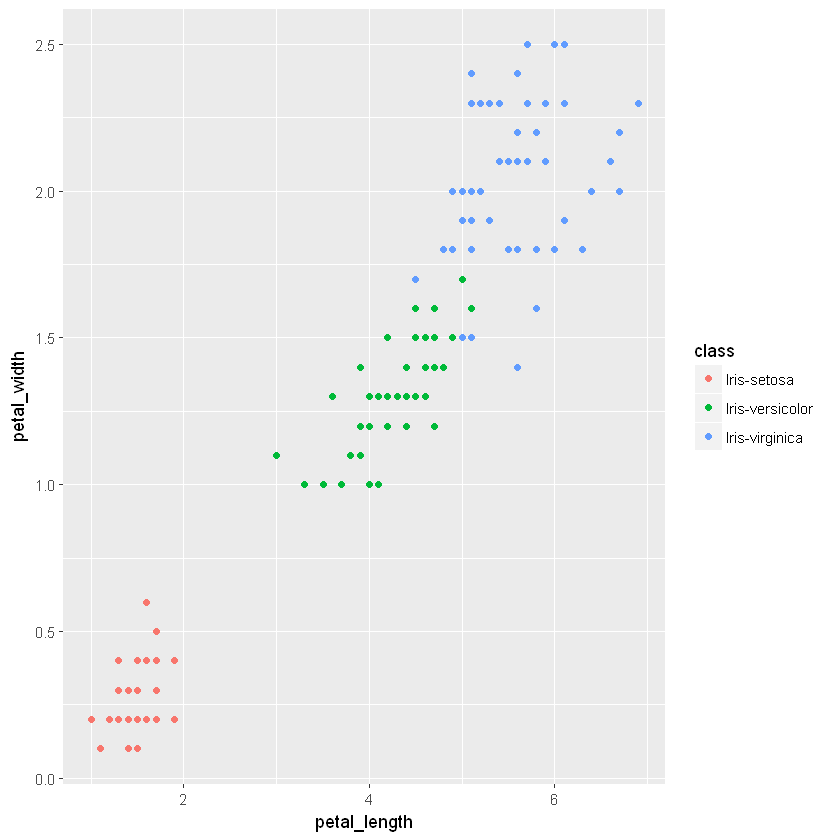

In [57]:
library(ggplot2)
ggplot(df, aes(petal_length, petal_width, color = class)) + 
    geom_point()

In [58]:
seed = 101
set.seed(seed)
# class
class = df[,5]
# feature
df = df[,1:4]

## 1. K Means Clustering

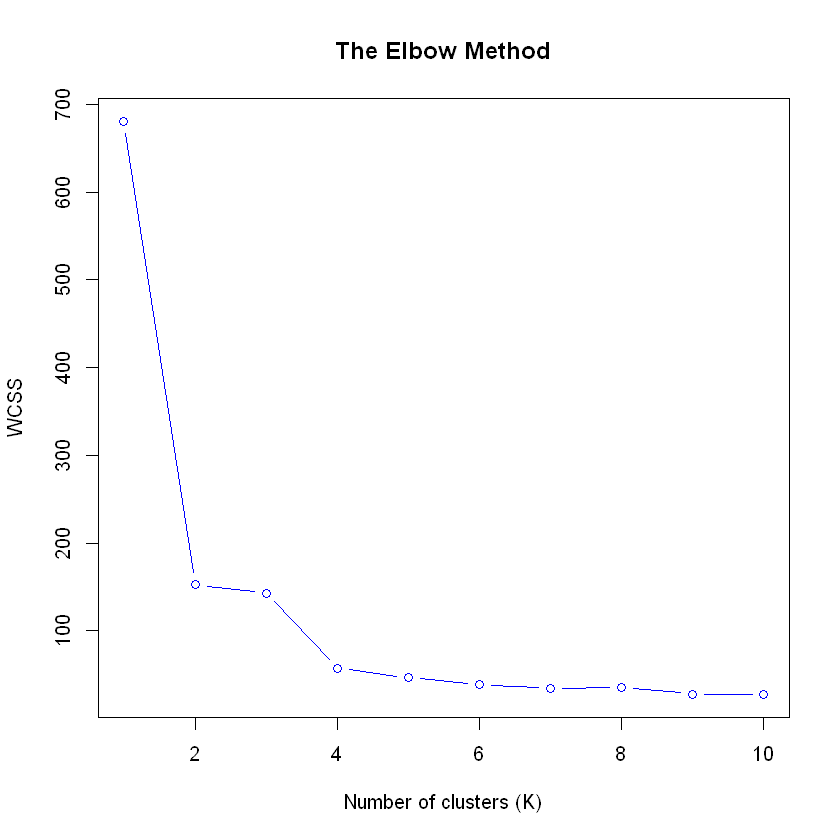

In [59]:
# Use the elbow method to find the optimal K, if k is unknown 
wcss = vector()
for (i in 1:10) wcss[i] = sum(kmeans(df, i)$withinss)
plot(1:10, wcss, type = 'b', col = 'blue', #within-cluster sum of squares
     main = paste('The Elbow Method'),
     xlab = 'Number of clusters (K)',
     ylab = 'WCSS')

In [60]:
# Fit K-Means to the dataset
set.seed(seed)
kmeans = kmeans(x = df, centers = 3)
y_kmeans = kmeans$cluster
print(kmeans)

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  sepal_length sepal_width petal_length petal_width
1     5.901613    2.748387     4.393548    1.433871
2     5.006000    3.418000     1.464000    0.244000
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 39.82097 15.24040 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [61]:
# Evaluate model
table(y_kmeans, class)

        class
y_kmeans Iris-setosa Iris-versicolor Iris-virginica
       1           0              48             14
       2          50               0              0
       3           0               2             36

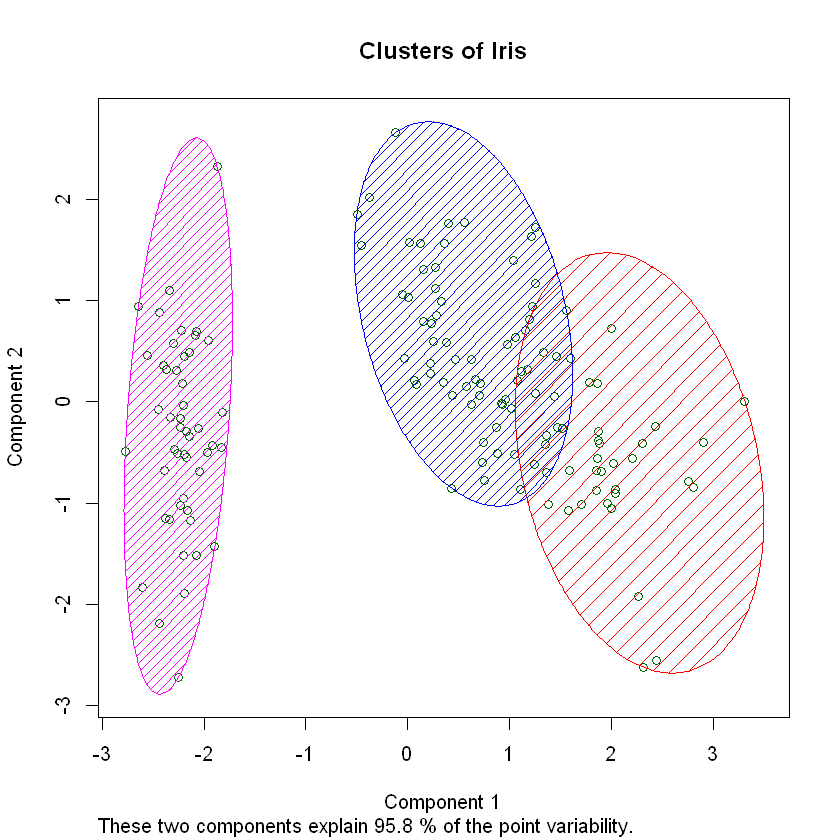

In [62]:
# Visualize the clusters
library(cluster)
clusplot(df,
         y_kmeans,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         labels = 0,
         plotchar = FALSE,
         span = TRUE,
         main = paste('Clusters of Iris'))

## 2. Hierarchical Clustering

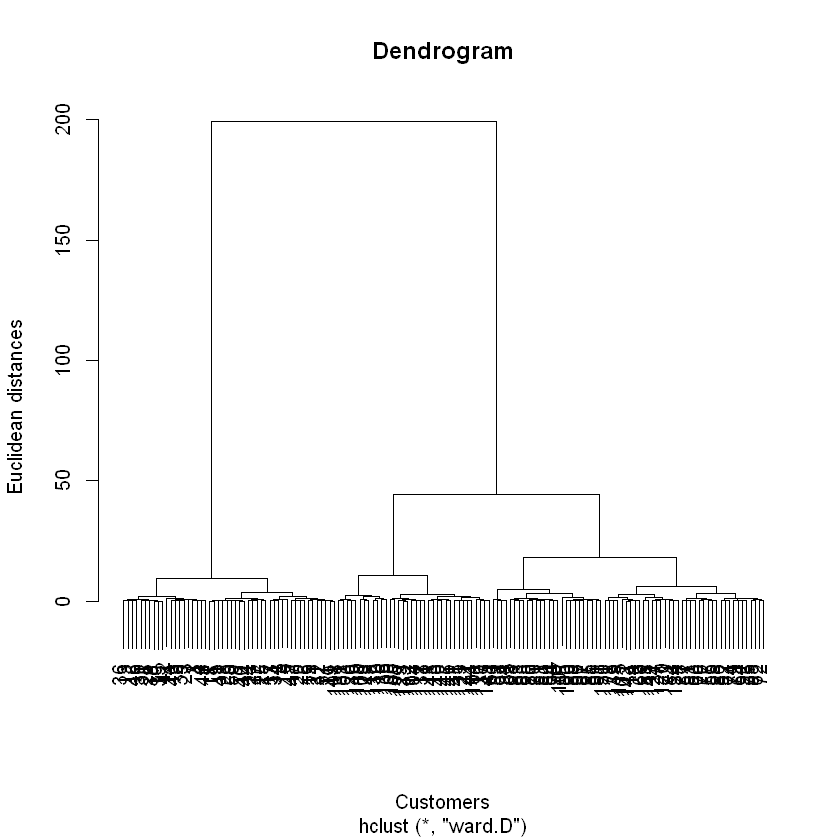

In [63]:
# Use the dendrogram to find the optimal number of clusters, if k is unknown
dendrogram = hclust(d = dist(df, method = 'euclidean'), method = 'ward.D')
plot(dendrogram,
     main = paste('Dendrogram'),
     xlab = 'Customers',
     ylab = 'Euclidean distances')

In [64]:
# Fit hc to the dataset  
hc = hclust(d = dist(df, method = 'euclidean'), method = 'ward.D')
y_hc = cutree(hc, 3)

In [65]:
# Evaluate model
table(y_hc, class)

    class
y_hc Iris-setosa Iris-versicolor Iris-virginica
   1          50               0              0
   2           0              50             14
   3           0               0             36

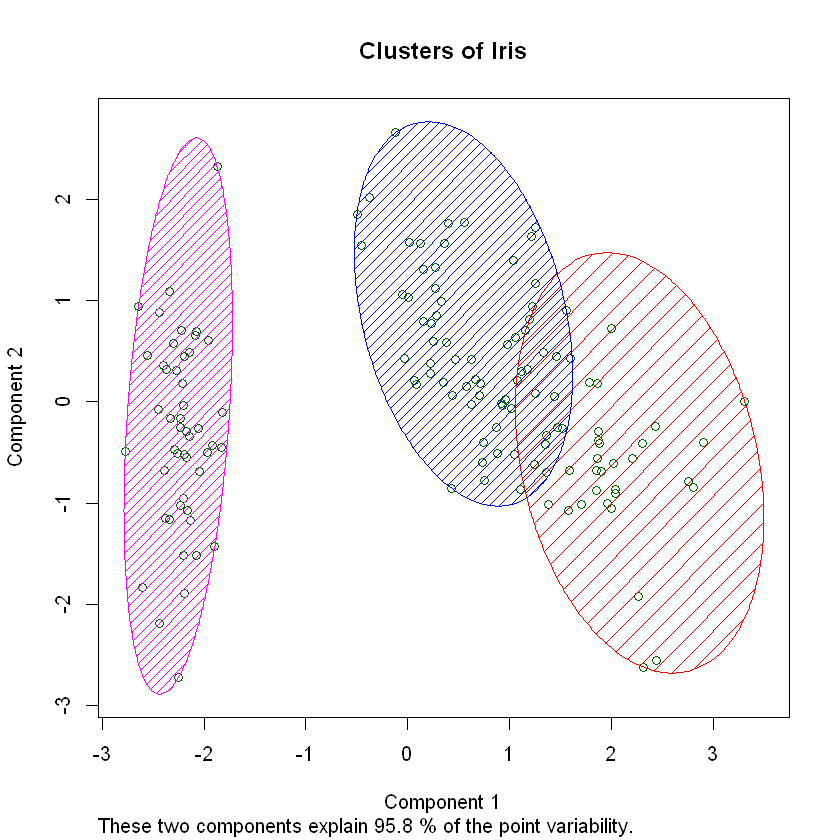

In [66]:
# Visualize the clusters
library(cluster)
clusplot(df,y_hc,lines = 0,shade = TRUE,color = TRUE,labels= 0,
         plotchar = FALSE,span = TRUE,
         main = paste('Clusters of Iris'))